have to merger train and test files 

### Import libraries

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot as plt
import matplotlib 
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import _is_arraylike_not_scalar
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Loading the data 

In [77]:
df = pd.read_csv("Loan_prediction_train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [78]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [79]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [82]:
#total number of rows
df.shape[0]

614

In [83]:
df.shape[1]

13

### Preprocessing the dataset

In [84]:
#find null values
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [85]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [86]:
# fill the missing values for the numerical terms  using mean

In [87]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [88]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [89]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [90]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [91]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [92]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [93]:
# fill the missing values for the numerical terms  using mode

In [94]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [95]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [96]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [97]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [98]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [99]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [100]:
# Replace NaN values with 0 before converting to int
df['CoapplicantIncome'].fillna(0, inplace=True)
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)


In [101]:
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)

In [102]:
df['CoapplicantIncome']

0         0
1      1508
2         0
3      2358
4         0
       ... 
609       0
610       0
611     240
612       0
613       0
Name: CoapplicantIncome, Length: 614, dtype: int32

In [103]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## Exploratory Data Analysis

#### Categorical attributes visualization

In [104]:
sns.countplot(df['Gender'])

ValueError: could not convert string to float: 'Male'

In [ ]:
sns.countplot(df['Married'])

In [ ]:
sns.countplot(df['Dependents'])

In [ ]:
sns.countplot(df['Education'])

In [ ]:
sns.countplot(df['Self_Employed'])

In [ ]:
sns.countplot(df['Property_Area'])

In [ ]:
sns.countplot(df['Loan_Status'])

#### Numerical attributes visualization

In [ ]:
sns.distplot(df['ApplicantIncome'])

In [ ]:
# Apply log transformation to the attribute
# df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

In [ ]:
sns.distplot(df['ApplicantIncome'])

In [ ]:
sns.distplot(df['CoapplicantIncome'])

In [ ]:
# df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])
# sns.distplot(df['CoapplicantIncome'])

In [ ]:
sns.distplot(df['LoanAmount'])

In [ ]:
# df['LoanAmount'] = np.log(df['LoanAmount'])
# sns.distplot(df['LoanAmount'])

In [ ]:
sns.distplot(df['Loan_Amount_Term'])

### Creation of new attribute

In [ ]:
# total income 
df["Total_income"] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [105]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.000000,360.0,1.0,Urban,Y


### Log Tranformation to attribute 

In [106]:
#applying log tranformation to attribute 

<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

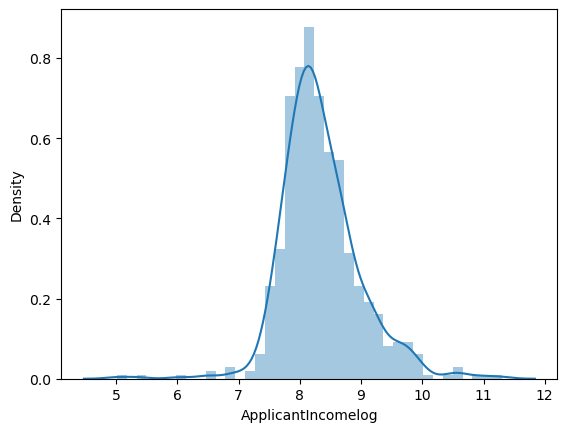

In [107]:
df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomelog'])

In [108]:
# df['CoapplicantIncomelog'] = np.log(df['CoapplicantIncome'])
# df.dropna(subset=['CoapplicantIncomelog', 'CoapplicantIncome'], inplace=True)
# sns.distplot(df['CoapplicantIncomelog'])

<Axes: xlabel='LoanAmountlog', ylabel='Density'>

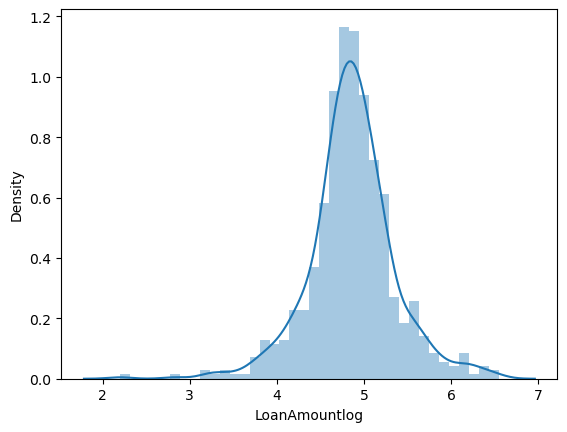

In [109]:
df['LoanAmountlog'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmountlog'])

<Axes: xlabel='Loan_Amount_Termlog', ylabel='Density'>

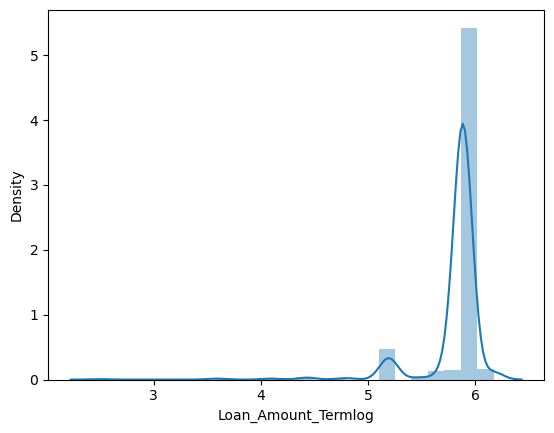

In [110]:
df['Loan_Amount_Termlog'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Termlog'])

In [111]:
df['Total_incomelog'] = np.log(df['Total_income'])
sns.distplot(df['Total_incomelog'])

KeyError: 'Total_income'

### Coorelation Matrix 

<Axes: >

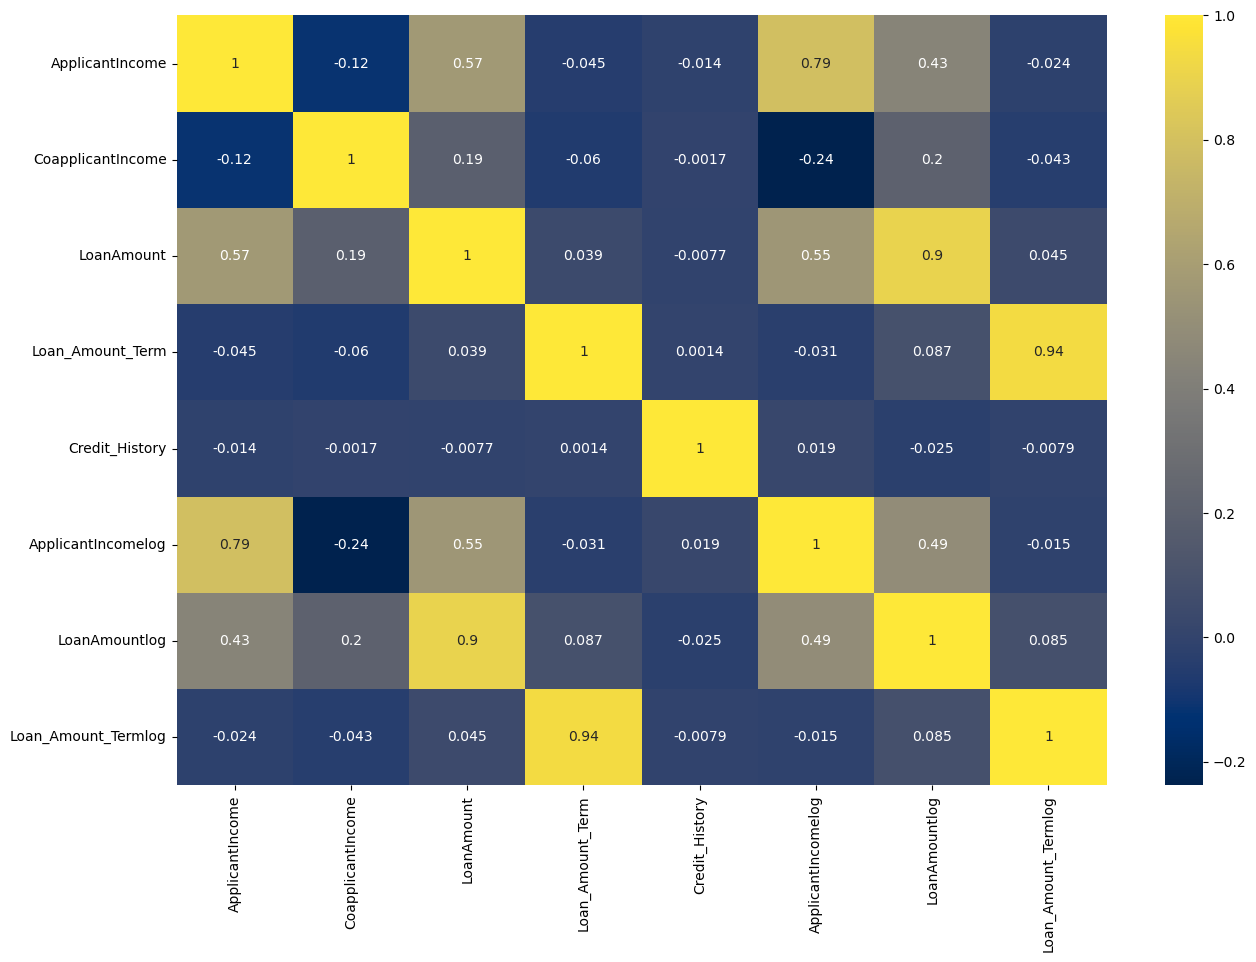

In [112]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True,cmap="cividis" )

In [113]:
# drop unneccesary colums 
cols = ["ApplicantIncome", "CoapplicantIncome","LoanAmount","Loan_Amount_Term","Total_income","Loan_ID","CoapplicantIncomelog"]
df = df.drop(columns= cols, axis=1)

KeyError: "['Total_income', 'CoapplicantIncomelog'] not found in axis"

In [114]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog
0,LP001002,Male,No,0,Graduate,No,5849,0,146.412162,360.0,1.0,Urban,Y,8.674026,4.986426,5.886104
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.000000,360.0,1.0,Rural,N,8.430109,4.852030,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.000000,360.0,1.0,Urban,Y,8.006368,4.189655,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.000000,360.0,1.0,Urban,Y,7.856707,4.787492,5.886104
4,LP001008,Male,No,0,Graduate,No,6000,0,141.000000,360.0,1.0,Urban,Y,8.699515,4.948760,5.886104


### Lable Encoding 

In [115]:
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [116]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog
0,LP001002,1,0,0,0,0,5849,0,146.412162,360.0,1.0,2,1,8.674026,4.986426,5.886104
1,LP001003,1,1,1,0,0,4583,1508,128.000000,360.0,1.0,0,0,8.430109,4.852030,5.886104
2,LP001005,1,1,0,0,1,3000,0,66.000000,360.0,1.0,2,1,8.006368,4.189655,5.886104
3,LP001006,1,1,0,1,0,2583,2358,120.000000,360.0,1.0,2,1,7.856707,4.787492,5.886104
4,LP001008,1,0,0,0,0,6000,0,141.000000,360.0,1.0,2,1,8.699515,4.948760,5.886104


### Train-Test split 

In [129]:
y = df['Loan_Status']  # Convert y to a 1D array
# Then use train_test_split() with X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Model Trainning 

In [140]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [141]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

ValueError: could not convert string to float: 'LP001319'